## Property Price Prediction using Machine Learning Methods
### 1. Load the dataset

In [58]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the dataset
property_data = pd.read_csv(r"property_data.csv")
property_data.head()

,BedRooms,Bath rooms,Size_sqft,location,year built,Garage Available,Furnishing,House Condition,Has_Pool,Lot Size,Price($)
0,3.0,1.0,1149,Rural,2004,NaN,Unfurnished,new,0.0,0.15,244043
1,NaN,2.0,1169,Rural,1989,1.0,NaN,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,gd,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,NaN,new,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,furnised,old,1.0,0.39,334791


### 2. Data Cleaning and Preprocessing

In [60]:
# Check the data information
property_data.isnull().sum()

 BedRooms            46
Bath rooms           59
Size_sqft             0
location              0
year built            0
Garage Available    104
Furnishing          157
House Condition       0
Has_Pool             55
Lot Size              0
Price($)              0
dtype: int64

In [61]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    BedRooms         954 non-null    float64
 1   Bath rooms        941 non-null    float64
 2   Size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year built        1000 non-null   int64  
 5   Garage Available  896 non-null    float64
 6   Furnishing        843 non-null    object 
 7   House Condition   1000 non-null   object 
 8   Has_Pool          945 non-null    float64
 9   Lot Size          1000 non-null   float64
 10  Price($)          1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


The property data has columns with missing values namely Bedrooms, Bathrooms, Garage available, Furnishing and Has pool

In [62]:
# Fix column naming inconsistencies
property_data.columns = property_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)
property_data.columns
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          954 non-null    float64
 1   bath_rooms        941 non-null    float64
 2   size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year_built        1000 non-null   int64  
 5   garage_available  896 non-null    float64
 6   furnishing        843 non-null    object 
 7   house_condition   1000 non-null   object 
 8   has_pool          945 non-null    float64
 9   lot_size          1000 non-null   float64
 10  price             1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [63]:
# Replacing column entries for the furnishing column
property_data['furnishing'] = property_data['furnishing'].replace({
    'furnised': 'furnished',
    'Furnished': 'furnished',
    'unfurnised': 'unfurnished',
    'Semi-Furnished':'semi_furnished',
    'Semi furnished':'semi_furnished',
    'Unfurnished':'unfurnished'
})
property_data['furnishing'] = property_data['furnishing'].astype('category')
property_data['furnishing'].cat.categories

Index(['furnished', 'semi_furnished', 'unfurnished'], dtype='object')

In [64]:
# The location column
property_data['location'] = property_data['location'].astype('category')
property_data['location'] = property_data['location'].replace({
    'Rural': 'rural',
    'Suburban': 'sub_urban',
    'Urban': 'urban',
    'ruraal': 'rural',
    'urbn': 'urban',
    'sub-urban': 'sub_urban'
})

In [65]:
property_data['location'].cat.categories

Index(['rural', 'sub_urban', 'urban'], dtype='object')

In [66]:
# The house condition variable
property_data['house_condition'] = property_data['house_condition'].astype('category')
property_data['house_condition'] = property_data['house_condition'].replace({
    'Good': 'good',
    'New': 'new',
    'Old': 'old',
    'gd': 'good'
})

In [67]:
property_data['house_condition'].cat.categories

Index(['good', 'new', 'old'], dtype='object')

What I have done above is to fix any inconsistencies that were present in the data entries, like wrong spellings, improper capitalization etc. for the columns furnishing, location and house consition.

Next, we handle the missing values present in the data

In [68]:
# For the bedrooms variable, we replace the missing values with the mode
# calculate the mode
mode_value = property_data['bedrooms'].mode()[0]
print(mode_value)
# fill the missing values
property_data['bedrooms'].fillna(mode_value, inplace=True)
property_data['bedrooms'].isnull().sum()

3.0


np.int64(0)

In [69]:
# The bathrooms column
# calculate the mode
mode_value = property_data['bath_rooms'].mode()[0]
print(mode_value)
# fill the missing values with  mode value
property_data['bath_rooms'].fillna(mode_value,inplace=True)
property_data['bath_rooms'].isnull().sum()

2.0


np.int64(0)

In [70]:
# Garage available
mode_value = property_data['garage_available'].mode()[0]
print(mode_value)
property_data['garage_available'].fillna(mode_value, inplace=True)
property_data['garage_available'].isnull().sum()

1.0


np.int64(0)

In [71]:
# Has Pool
mode_value = property_data['has_pool'].mode()[0]
print(mode_value)
property_data['has_pool'].fillna(mode_value, inplace=True)
property_data['has_pool'].isnull().sum()

0.0


np.int64(0)

In [72]:
# Furnishing
mode_value = property_data['furnishing'].mode()[0]
print(mode_value)
property_data['furnishing'].fillna(mode_value, inplace=True)
property_data['furnishing'].isnull().sum()

semi_furnished


np.int64(0)

In [73]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bedrooms          1000 non-null   float64 
 1   bath_rooms        1000 non-null   float64 
 2   size_sqft         1000 non-null   int64   
 3   location          1000 non-null   category
 4   year_built        1000 non-null   int64   
 5   garage_available  1000 non-null   float64 
 6   furnishing        1000 non-null   category
 7   house_condition   1000 non-null   category
 8   has_pool          1000 non-null   float64 
 9   lot_size          1000 non-null   float64 
 10  price             1000 non-null   int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 65.9 KB


### 3. Feature Engineering

#### Creating new columns

In [74]:
from datetime import datetime
current_year = datetime.now().year
print(current_year)

2025


In [75]:
# the new column house_age
property_data['house_age'] = current_year - property_data['year_built']
property_data['house_age']

0      21
1      36
2      32
3       4
4      16
       ..
995    23
996    28
997    32
998    31
999    31
Name: house_age, Length: 1000, dtype: int64

In [76]:
# Export the cleaned data into csv file
property_data.to_csv('House Prices data.csv', index=True)

### 4. Exploratory Data Analysis

#### Here, we build visualizations that represent how the data is shaped, it is informative during the modeling process

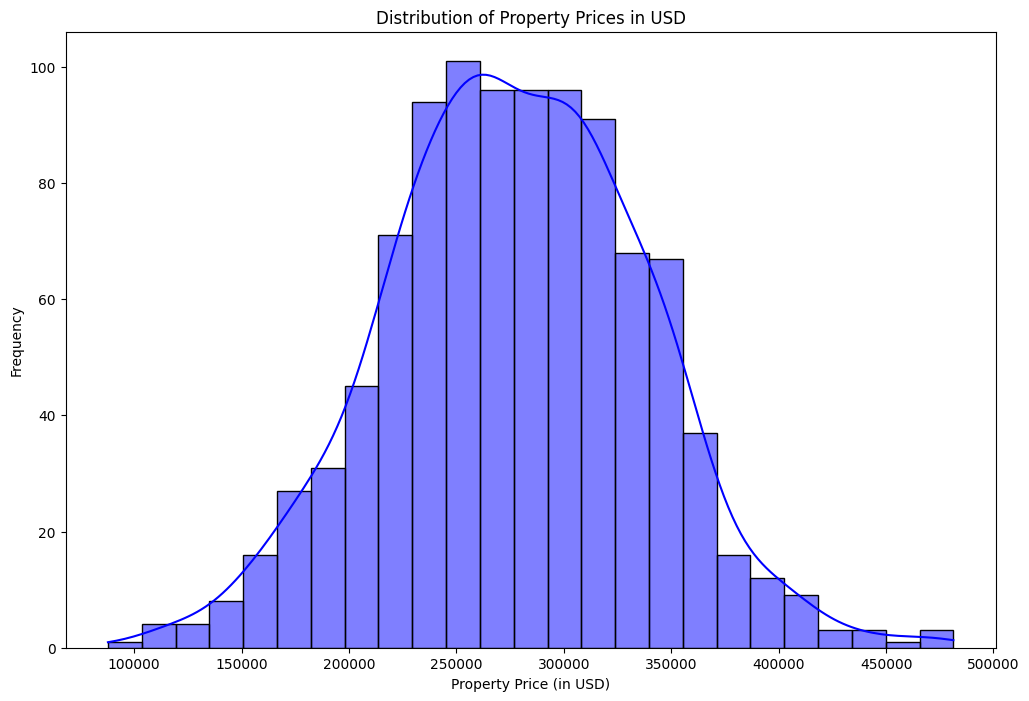

In [77]:
# The distribution of the dependent variable - Price
# It is a continuous variable, so we use either the boxplot or the histogram to visualiza it
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='price', kde=True, color='blue')
plt.title('Distribution of Property Prices in USD')
plt.ylabel('Frequency')
plt.xlabel('Property Price (in USD)')
plt.show()


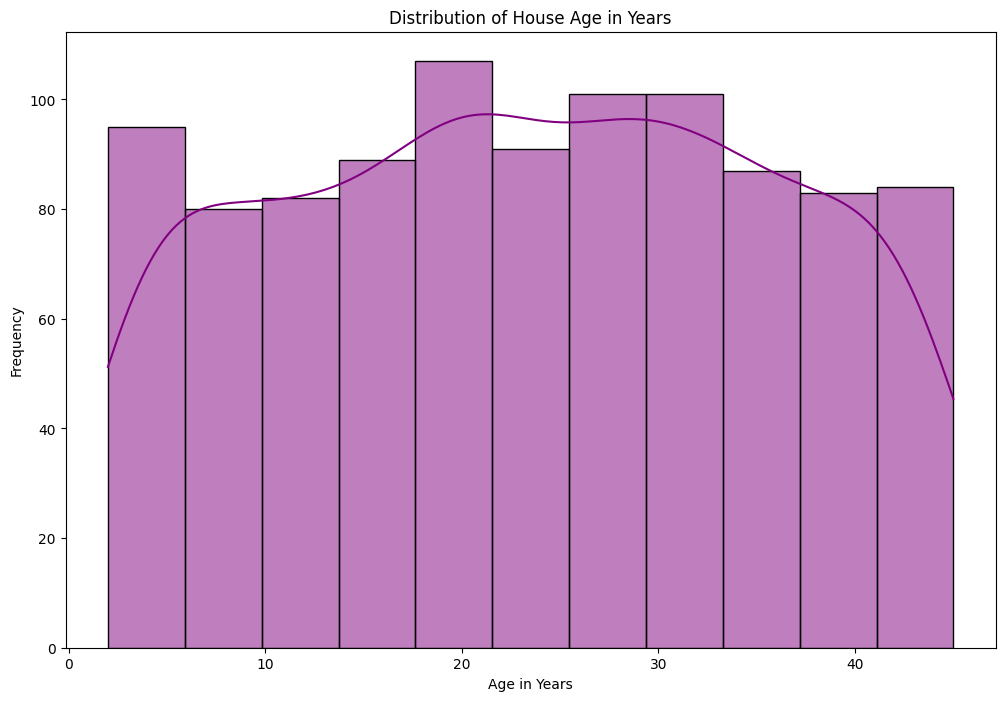

In [78]:
# Distribution of Age
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='house_age', kde=True, color='purple')
plt.title('Distribution of House Age in Years')
plt.ylabel('Frequency')
plt.xlabel('Age in Years')
plt.show()

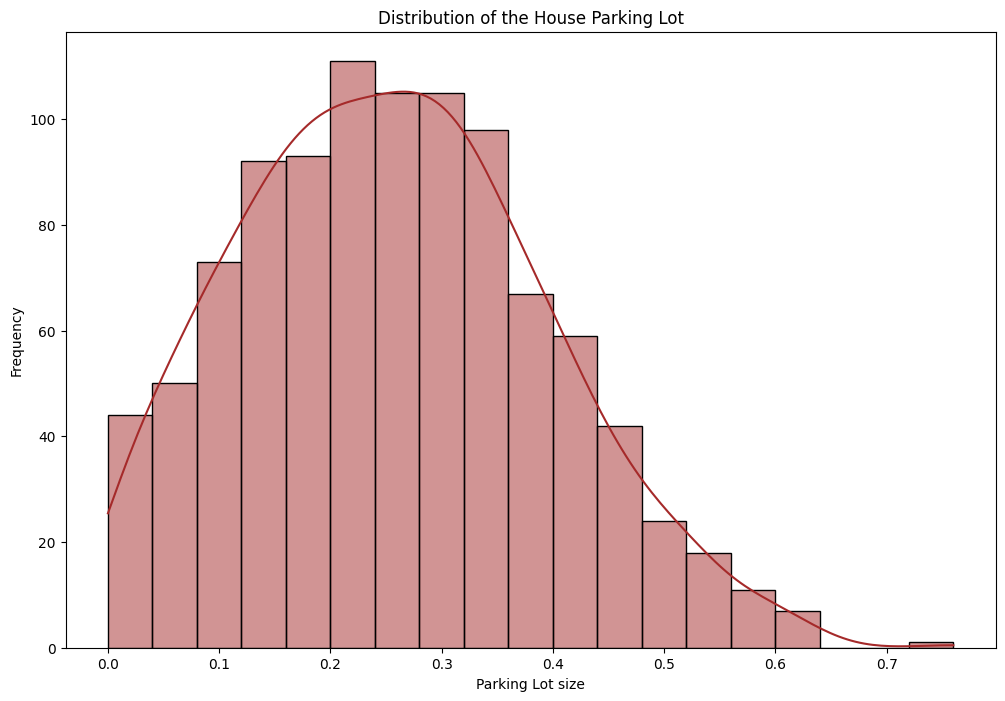

In [79]:
# Distribution of Parking Lot size
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='lot_size', kde=True, color='brown')
plt.title('Distribution of the House Parking Lot')
plt.ylabel('Frequency')
plt.xlabel('Parking Lot size')
plt.show()

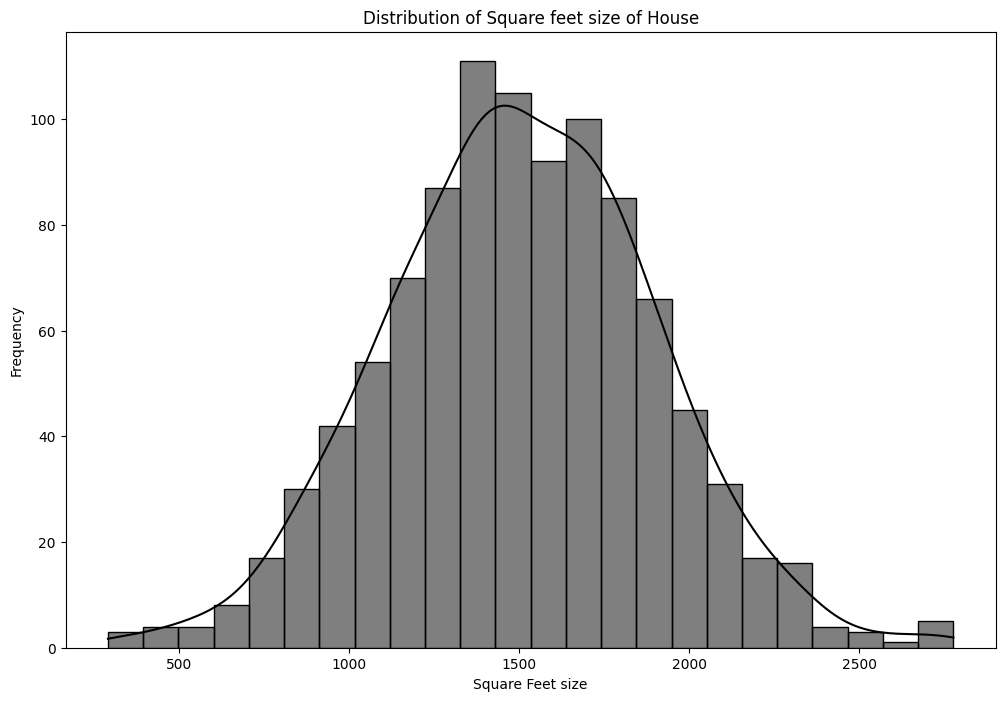

In [80]:
# Distribution of house square feet
plt.figure(figsize=(12,8))
sns.histplot(data=property_data, x='size_sqft', kde=True, color='black')
plt.title('Distribution of Square feet size of House')
plt.ylabel('Frequency')
plt.xlabel('Square Feet size')
plt.show()

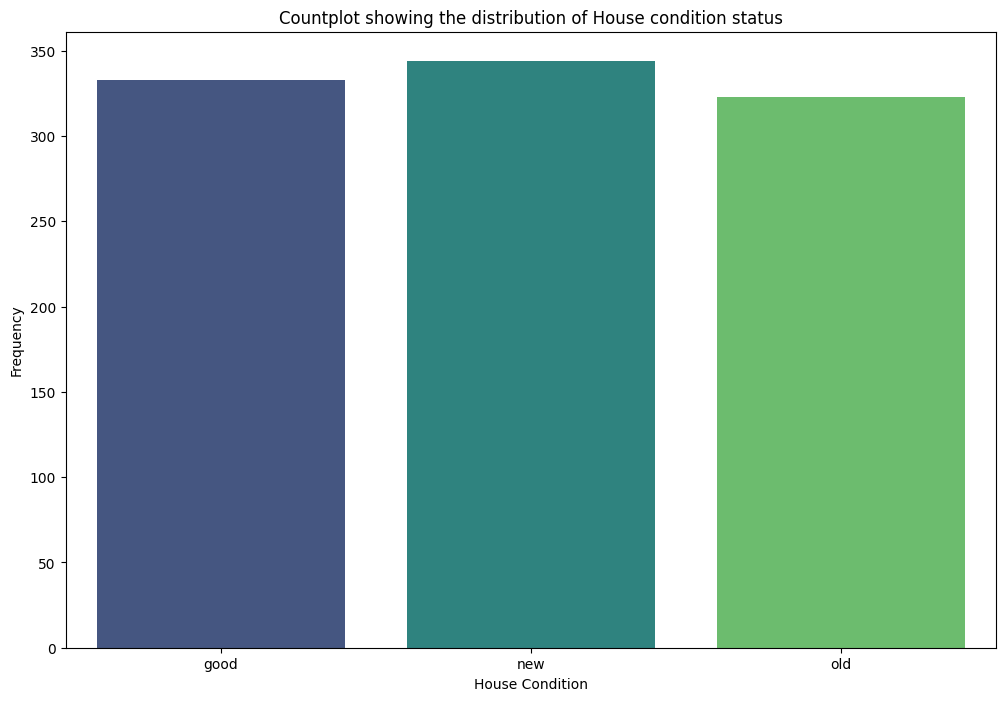

In [81]:
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='house_condition', palette='viridis', legend=False)
plt.title('Countplot showing the distribution of House condition status')
plt.ylabel('Frequency')
plt.xlabel('House Condition')
plt.show()

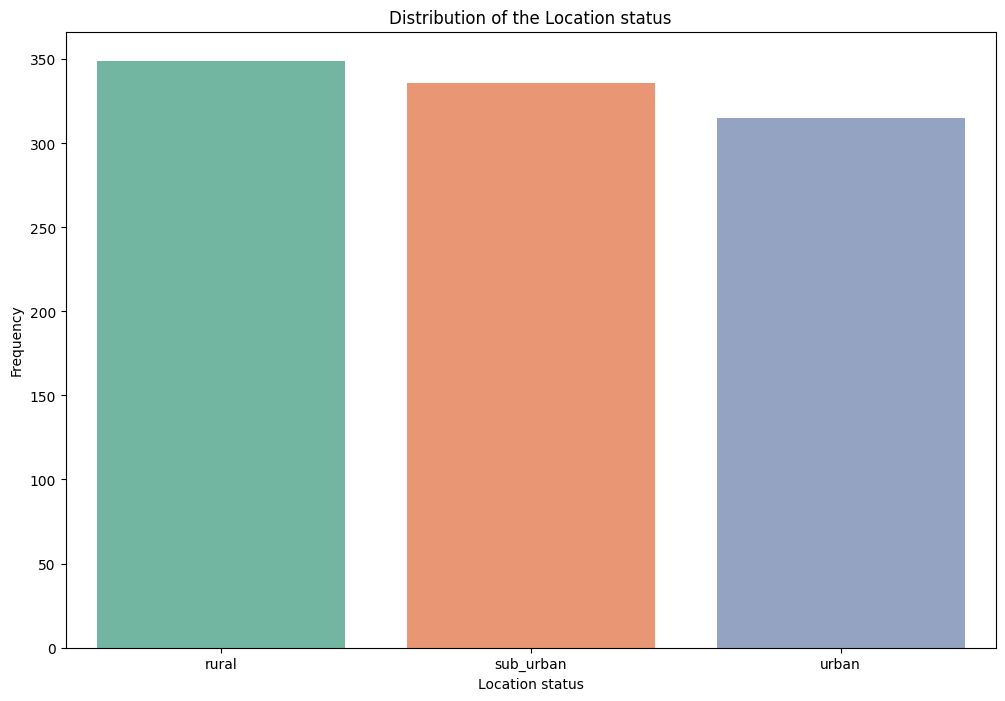

In [82]:
# Location
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='location', legend=False, palette='Set2')
plt.title('Distribution of the Location status')
plt.ylabel('Frequency')
plt.xlabel('Location status')
plt.show()

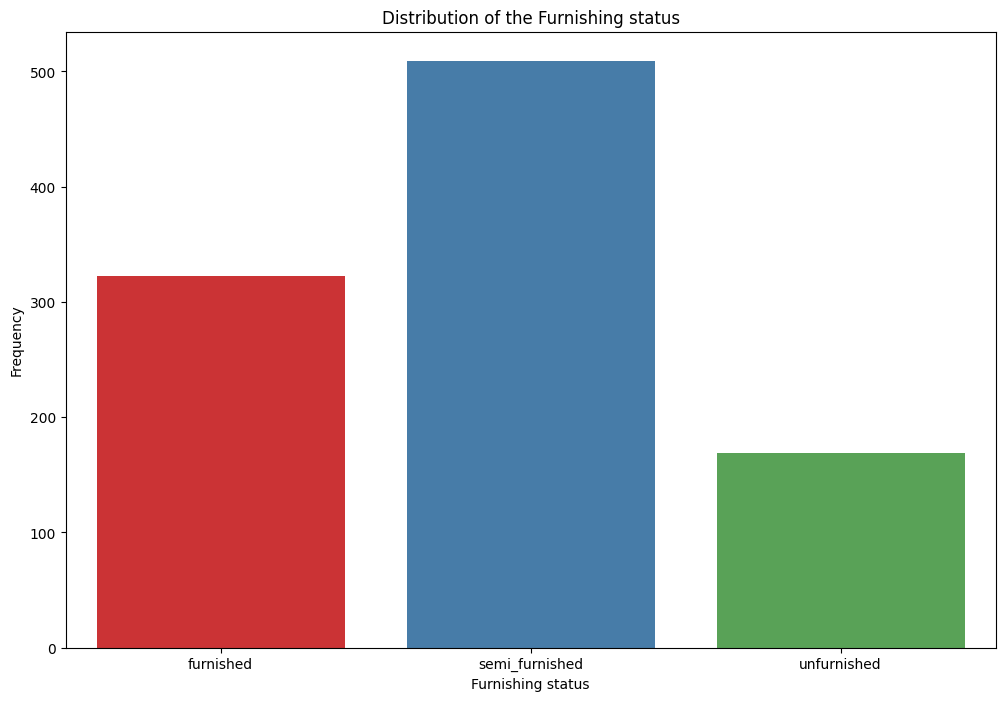

In [83]:
# Furnishing
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='furnishing', legend=False, palette='Set1')
plt.title('Distribution of the Furnishing status')
plt.ylabel('Frequency')
plt.xlabel('Furnishing status')
plt.show()

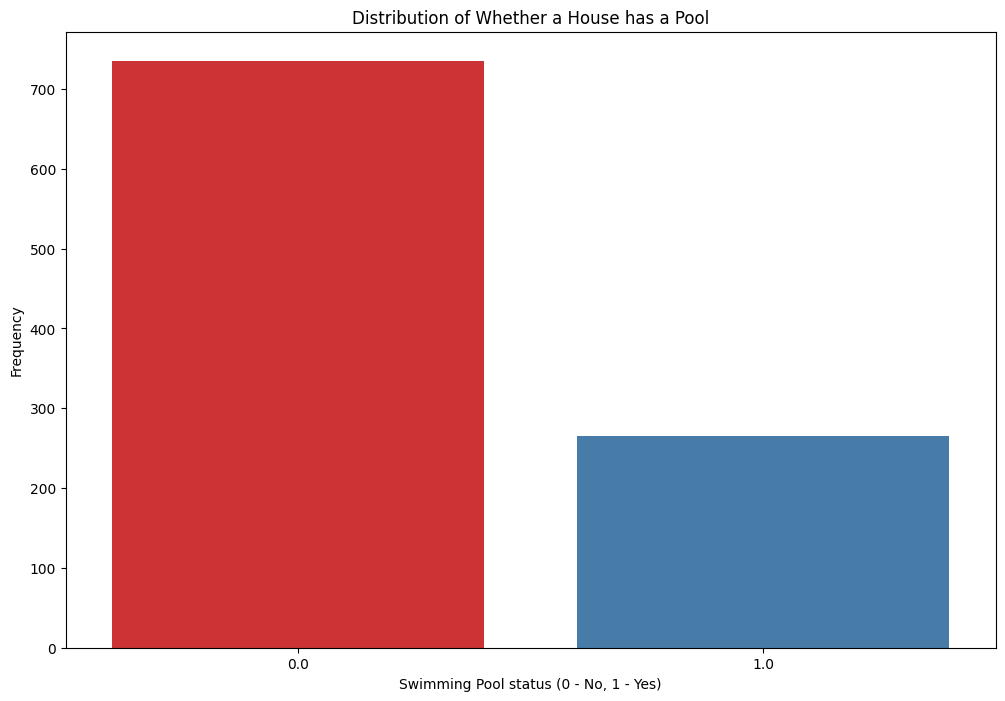

In [84]:
# Has pool
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='has_pool', legend=False, palette='Set1')
plt.title('Distribution of Whether a House has a Pool')
plt.ylabel('Frequency')
plt.xlabel('Swimming Pool status (0 - No, 1 - Yes)')
plt.show()

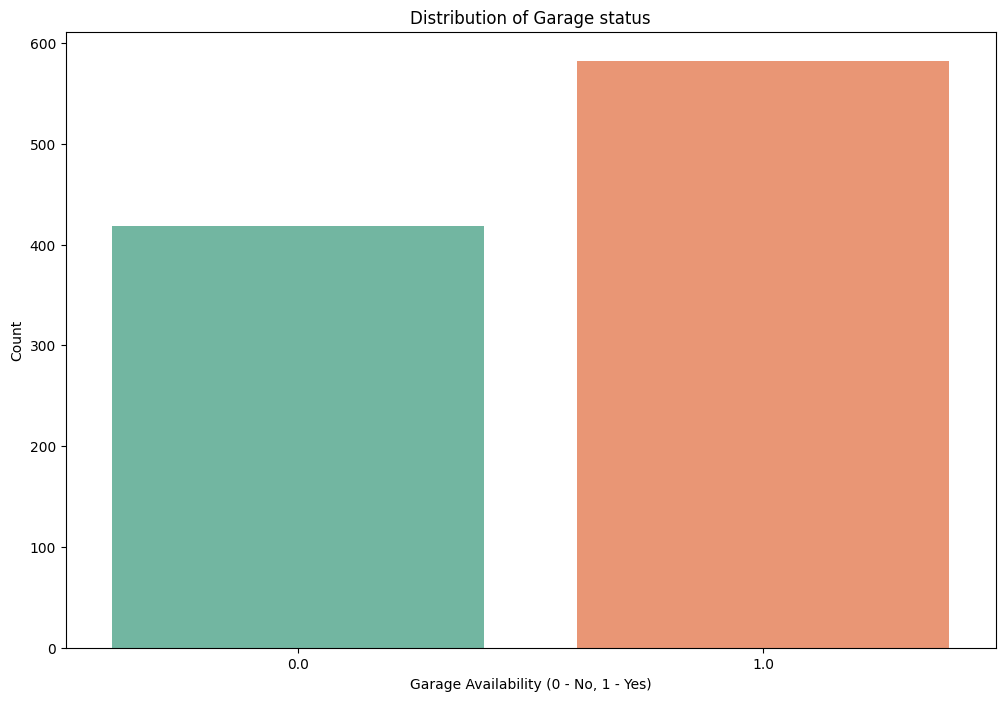

In [85]:
# Garage Availability
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='garage_available', legend=False, palette='Set2')
plt.title('Distribution of Garage status')
plt.ylabel('Count')
plt.xlabel('Garage Availability (0 - No, 1 - Yes)')
plt.show()

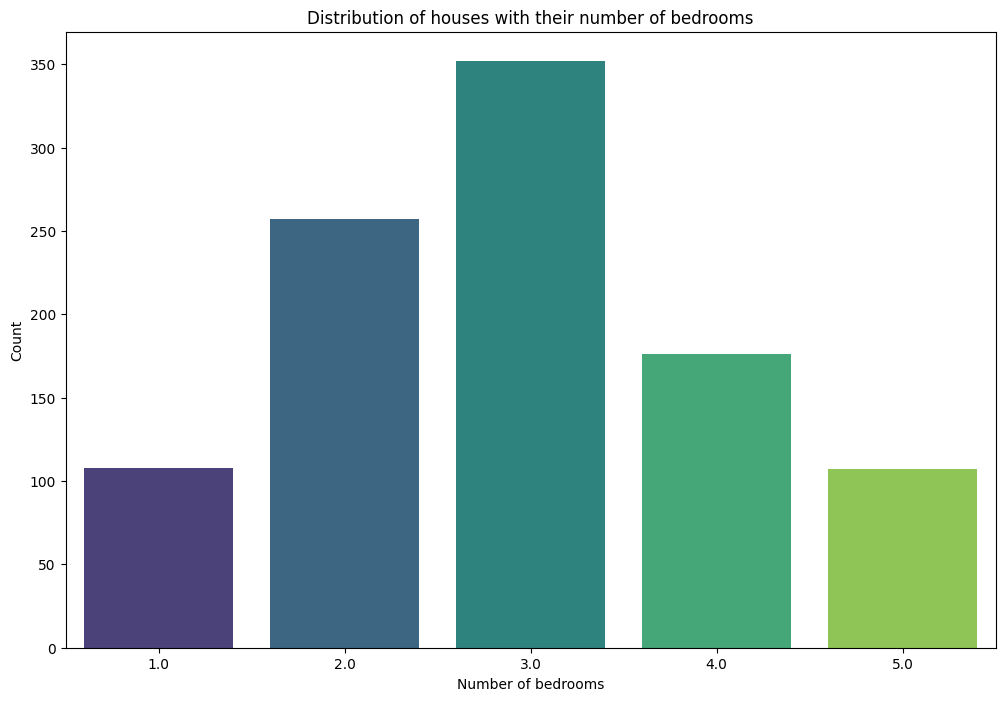

In [86]:
# The distribution of number of bedrooms and bathrooms
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='bedrooms', legend=False, palette='viridis')
plt.title('Distribution of houses with their number of bedrooms')
plt.ylabel('Count')
plt.xlabel('Number of bedrooms')
plt.show()

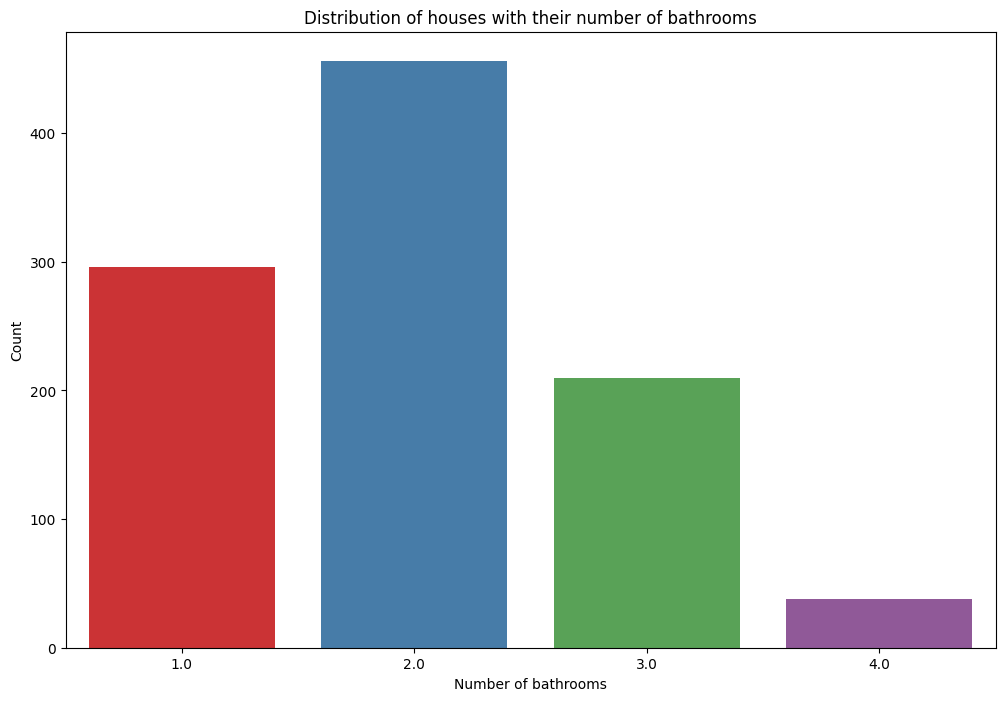

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(data=property_data, x='bath_rooms', legend=False, palette='Set1')
plt.title('Distribution of houses with their number of bathrooms')
plt.ylabel('Count')
plt.xlabel('Number of bathrooms')
plt.show()

In [88]:
# One-hot encoding
#pd.get_dummies(property_data, columns=['location','furnishing',
                                                       #'garage_available','has_pool','house_condition'], drop_first=True)

In [89]:
# Convert categorical to numeric codes
property_data['location'] = property_data['location'].astype('category').cat.codes
property_data['furnishing'] = property_data['furnishing'].astype('category').cat.codes
property_data['house_condition'] = property_data['house_condition'].astype('category').cat.codes
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          1000 non-null   float64
 1   bath_rooms        1000 non-null   float64
 2   size_sqft         1000 non-null   int64  
 3   location          1000 non-null   int8   
 4   year_built        1000 non-null   int64  
 5   garage_available  1000 non-null   float64
 6   furnishing        1000 non-null   int8   
 7   house_condition   1000 non-null   int8   
 8   has_pool          1000 non-null   float64
 9   lot_size          1000 non-null   float64
 10  price             1000 non-null   int64  
 11  house_age         1000 non-null   int64  
dtypes: float64(5), int64(4), int8(3)
memory usage: 73.4 KB


### 5. Modeling

Here, we fit models to the cleaned data, that will be used to perform house price prediction. A Multiple Linear Regression model is a suitable model for this data, given the dependent variable (price) is a continuous variable.

We can compare the model with Random Forest Regressor.

#### Split the Dataset into the Training and Testing sets

In [90]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [91]:
# Prepare features X and y
property_data = property_data.drop(columns=['year_built'])
X = property_data.drop(columns=['price'])   # drop the target variable
y = property_data['price']
X.head()
y.head()

0    244043
1    211250
2    257239
3    310316
4    334791
Name: price, dtype: int64

In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
X_train.shape
X_test.shape

(200, 10)

In [94]:
# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
# Perform the prediction
y_pred = model.predict(X_test)

In [96]:
# Get the evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

11098.319963037931
9033.590651206336


In [97]:
r2 = r2_score(y_test, y_pred)
r2

0.967116852911263

In [98]:
print("Regression Performance:")
print(f"RMSE: {rmse: .2f}")
print(f"MAE: {mae: .2f}")
print(f"R-Squared: {r2: .4f}")

Regression Performance:
RMSE:  11098.32
MAE:  9033.59
R-Squared:  0.9671


### 6. Model Tuning

In [99]:
rf = RandomForestRegressor(random_state=42)
# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    rf, 
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [100]:
print("\nBest Random Forest Parameters:")
print(grid_search.best_params_)


Best Random Forest Parameters:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [101]:
# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
# The metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance (Tuned):")
print(f"RMSE: {rmse: .2f}")
print(f"MAE: {mae: .2f}")
print(f"R-Squared: {r2_rf: 4f}")


Random Forest Performance (Tuned):
RMSE:  10868.70
MAE:  8636.97
R-Squared:  0.968463


In [102]:
# Visual Representation of the R-squared metric comparing the 2 models
model_names = ['Multiple Regression model', 'Random Forest Regressor']
r2_scores = [r2, r2_rf]
print(r2_scores)

[0.967116852911263, 0.9684634782346486]


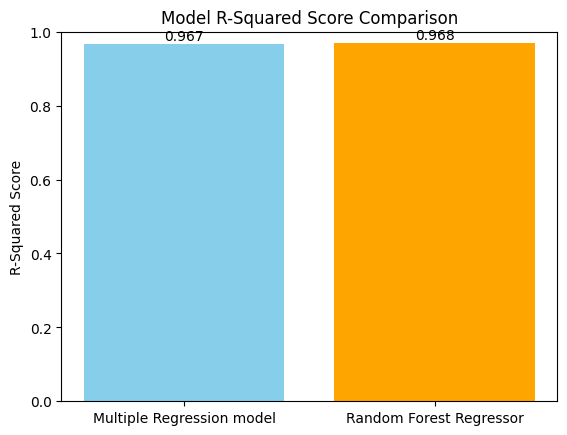

In [103]:
# Create bar plot
plt.bar(model_names, r2_scores, color=['skyblue', 'orange'])
plt.ylabel('R-Squared Score')
plt.ylim(0, 1)
plt.title('Model R-Squared Score Comparison')

# Add labels above bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', fontsize=10)

plt.show()